# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import norm

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of limits for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [3]:
# Variable pdf width!!!
# Precision better for small than for large mean

def sigma(mean):
#    sig = 0.6+ 0.15*mean
    sig = 1.+np.arctan(mean-1)/np.pi
    return sig

# Return value of x corresponsing to Frequentist upper (one-sided) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 

# Bayesian limit

def bayeslim(xm,cl):
    
    sigm = sigma(xm)
    
    # numerical integration settings
    
    mmin = 0   #   xm-5*sigm
    mmax = xm+5*sigm
    mbin = 2000
    
    dm = (mmax-mmin)/mbin
    mval = np.linspace(mmin+dm/2,mmax-dm/2,mbin)
    sval = sigma(mval)
    dp = dm*norm.pdf(xm,mval,sval)
    
    pint = np.sum(dp)
    
    psum = 0
    mlim = mmin
    
    for im in range(mbin):
        psum+=dp[im]/pint
        if(psum>cl):
            mlim = mval[im]-dm/2
            break
#        print(mval[im],sval[im],dp[im],psum)  # Debug output
    
    return mlim


### (3) Define set of hypothesis

In [4]:
# Considered values of true mean

# vmean = np.linspace(0.,6.,13)
# vmean = np.linspace(0.,6.,61)
vmean = np.linspace(0.,6.,601)

CL = 0.95            # One sided!

vlow = problim(vmean,1-CL)

# Values of measured x (for Bayesian curve)

vmeas = np.linspace(-2.,4.,61)

vbay = np.empty(vmeas.size)

for im in range(vmeas.size):
    vbay[im] = bayeslim(vmeas[im],CL)


### (4)  Print interval information

In [5]:
print("\nBayesian upper limit for mu:")

print("\n  Measured x     mu_ul ")

for im in range(vmeas.size) :
    print ("%10.3f   %8.3f " % (vmeas[im],vbay[im]))



Bayesian upper limit for mu:

  Measured x     mu_ul 
    -2.000      0.929 
    -1.900      1.030 
    -1.800      1.131 
    -1.700      1.229 
    -1.600      1.323 
    -1.500      1.415 
    -1.400      1.503 
    -1.300      1.586 
    -1.200      1.665 
    -1.100      1.741 
    -1.000      1.812 
    -0.900      1.880 
    -0.800      1.945 
    -0.700      2.010 
    -0.600      2.074 
    -0.500      2.137 
    -0.400      2.201 
    -0.300      2.266 
    -0.200      2.335 
    -0.100      2.404 
     0.000      2.477 
     0.100      2.551 
     0.200      2.630 
     0.300      2.711 
     0.400      2.797 
     0.500      2.883 
     0.600      2.974 
     0.700      3.068 
     0.800      3.163 
     0.900      3.258 
     1.000      3.357 
     1.100      3.458 
     1.200      3.560 
     1.300      3.663 
     1.400      3.766 
     1.500      3.869 
     1.600      3.973 
     1.700      4.078 
     1.800      4.181 
     1.900      4.283 
     2.000      4.389 
  

### (5) Draw probability intervals

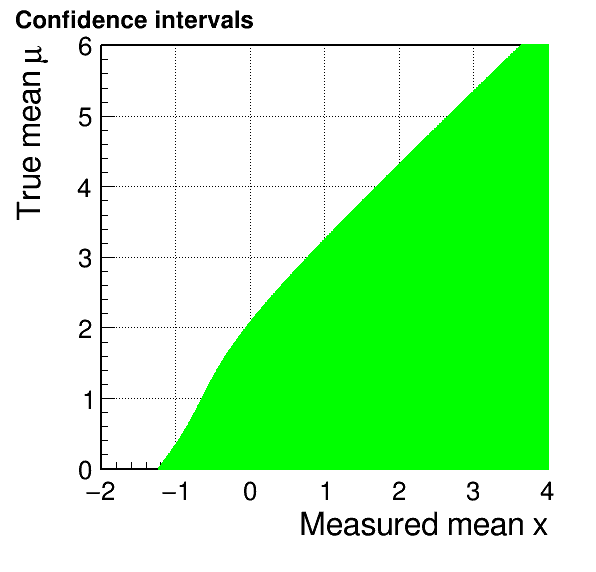

Info in <TCanvas::Print>: png file 06_gauss_bayes2_1_61.png has been created


In [6]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

gStyle.SetCanvasDefH(600)  # To match that in the paper

cexp = TCanvas('cexp')
   
# Histogram to produce frame

Xmin=-2
Xmax=4
Ymin=0
Ymax=6

hexp = TH1D('hexp','Confidence intervals',10, Xmin, Xmax)

hexp.GetXaxis().SetTitle("Measured mean x")
hexp.GetYaxis().SetTitle("True mean #mu")
hexp.SetMinimum(Ymin)
hexp.SetMaximum(Ymax)
hexp.SetLineWidth(0)    # To suppress horizontal line at zero

# No statistics

hexp.SetStats(0)

# Plot empty histogram (frame)

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

# Overlay frequentist probability interval lines

lint = TLine()
lint.SetLineColor(3)
lint.SetLineWidth(2)

for im in range(vmean.size) :
    vl=max(vlow[im],Xmin)
    vh=Xmax
    lint.DrawLine(vl,vmean[im],vh,vmean[im])

cexp.Update()
fname = '06_gauss_bayes2_1_'+str(vmeas.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (6) Generate limit graphs

In [7]:
lgr = TGraph(vmean.size,array('d',vlow),array('d',vmean))
bgr = TGraph(vmeas.size,array('d',vmeas),array('d',vbay))

# Set graph options

lgr.SetNameTitle("lgr","Lower edge of x probability interval")

lgr.SetMarkerStyle(20)
lgr.SetMarkerSize(0.7)
lgr.SetMarkerColor(2)
lgr.SetLineColor(2)
lgr.SetLineWidth(2)


bgr.SetNameTitle("bgr","Upper limit on true mean value")

bgr.SetMarkerStyle(20)
bgr.SetMarkerSize(0.7)
bgr.SetMarkerColor(4)
bgr.SetLineColor(4)
bgr.SetLineWidth(2)


### (7) Plot results

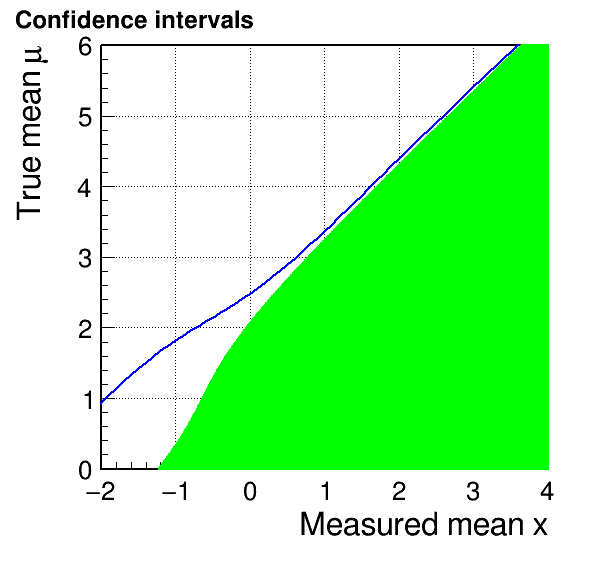

Info in <TCanvas::Print>: png file 06_gauss_bayes2_2_61.png has been created


In [8]:
# Plot limit graphs

#lgr.Draw('L')
bgr.Draw('L')

# Store and show

cexp.Update()
fname = '06_gauss_bayes2_2_'+str(vmeas.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (8) Hypothetical measurement

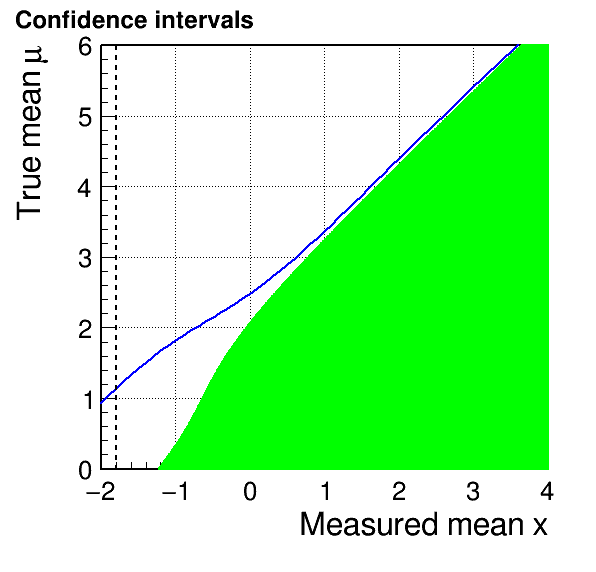

Info in <TCanvas::Print>: png file 06_gauss_bayes2_3_61.png has been created


In [9]:
Xm = -1.8

lxm = TLine()
lxm.SetLineColor(1)
lxm.SetLineWidth(2)
lxm.SetLineStyle(7)

lxm.DrawLine(Xm,Ymin,Xm,Ymax)

cexp.Update()
fname = '06_gauss_bayes2_3_'+str(vmeas.size)+'.png'
cexp.Print(fname)

Image(filename=fname)

In [10]:
# Look for proper point in limit table
# Interpolate between two points

for im in range(vmeas.size-1) :
    if Xm > vmeas[im] and Xm <= vmeas[im+1]:
        frac = (Xm-vmeas[im])/(vmeas[im+1]-vmeas[im])
        print('Upper limit : ',frac*vbay[im+1]+(1-frac)*vbay[im])


Upper limit :  1.1306901481300937
